# Часть 1

## Этап 1

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Настройки отображения
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

In [4]:
# загрузка датасета
data = pd.read_csv("./uplift_fp_data.csv")
data.head(10)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,treatment,target
0,10,1,142.44,1,0,1,0,1,1,0
1,6,2,329.08,1,1,2,1,2,0,0
2,7,1,180.65,0,1,1,1,2,1,0
3,9,4,675.83,1,0,2,1,2,0,0
4,2,0,45.34,1,0,0,0,2,1,0
5,6,1,134.83,0,1,1,0,1,1,1
6,9,2,280.20,1,0,1,1,1,1,0
7,9,0,46.42,0,1,0,0,1,1,0
8,9,4,675.07,1,1,2,1,1,0,0
9,10,0,32.84,0,1,0,1,2,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recency          64000 non-null  int64  
 1   history_segment  64000 non-null  int64  
 2   history          64000 non-null  float64
 3   mens             64000 non-null  int64  
 4   womens           64000 non-null  int64  
 5   zip_code         64000 non-null  int64  
 6   newbie           64000 non-null  int64  
 7   channel          64000 non-null  int64  
 8   treatment        64000 non-null  int64  
 9   target           64000 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 4.9 MB


In [6]:
# Общая информация
print("Размер датасета:", data.shape)
print("\nТипы данных:")
print(data.dtypes)

print("\nПропуски в данных:")
print(data.isnull().sum())

print("\nКоличество дубликатов:", data.duplicated().sum())

Размер датасета: (64000, 10)

Типы данных:
recency              int64
history_segment      int64
history            float64
mens                 int64
womens               int64
zip_code             int64
newbie               int64
channel              int64
treatment            int64
target               int64
dtype: object

Пропуски в данных:
recency            0
history_segment    0
history            0
mens               0
womens             0
zip_code           0
newbie             0
channel            0
treatment          0
target             0
dtype: int64

Количество дубликатов: 7015


In [7]:
# посмотрим на дубликаты
dubls = data[data.duplicated()]
dubls.head(10)

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,treatment,target
149,2,0,29.99,0,1,1,0,1,0,0
167,7,0,29.99,1,0,1,1,2,1,0
526,10,0,29.99,1,0,0,0,2,1,0
606,10,0,29.99,1,0,1,1,2,0,0
654,10,0,29.99,1,0,0,0,2,1,0
792,9,0,29.99,0,1,1,0,1,0,0
807,9,0,29.99,0,1,1,1,1,0,0
818,9,0,29.99,0,1,1,1,2,0,0
833,5,0,29.99,0,1,2,1,2,0,0
883,9,0,29.99,0,1,1,0,1,1,0


Дубликаты на мой взгляд могут быть осознанными. Например, один и тот же клиент встречается в выборке несколько раз (но у него одинаковые признаки). Но user_id в датасете нет и следовательно определить это разные клиенты или нет не возможно. Так как у меня данные про клиентов и их признаки для uplift-моделирования, дубликаты, скорее всего, не нужны (иначе модель будет учиться на повторяющихся наблюдениях и может сместить результаты). Поэтому дубликаты я удаляю

In [8]:
print(f"До очистки: {data.shape}")
data = data.drop_duplicates()
print(f"После очистки: {data.shape}")

До очистки: (64000, 10)
После очистки: (56985, 10)


**### Основные выводы:**
1. В тестовую группу попало 33% пользователей, контроль — 67%. Баланс не идеальный, но для статистики допустимо.
2. Пропуска значений в выборке нет
3. Дубликаты удалил т.к. модель будет учиться на повторяющихся наблюдениях и может сместить результаты

## Этап 2

### **EDA**


### 1. Анализ датасета:
проверяем сбалансированность выборки, оценив распределение целевой переменной между контрольной и тестовой группами;
- распределение treatment (0 = контроль, 1 = тест)

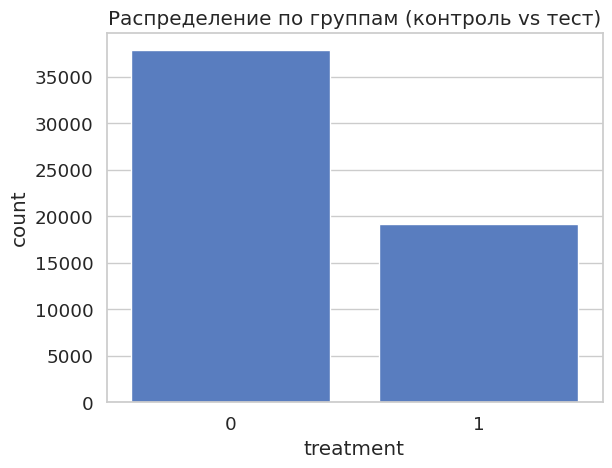

In [9]:
# распределение treatment (0 = контроль, 1 = тест)
sns.countplot(data=data, x='treatment')
plt.title("Распределение по группам (контроль vs тест)")
plt.savefig("./EDA/Allocation_into_groups.png")
plt.show()

- распределение целевой переменной target внутри treatment

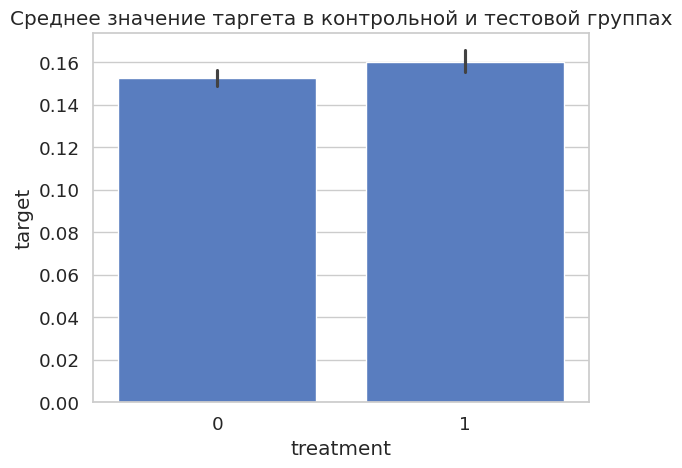

In [10]:
# распределение целевой переменной target внутри treatment
sns.barplot(data=data, x='treatment', y='target')
plt.title("Среднее значение таргета в контрольной и тестовой группах")
plt.savefig("./EDA/Avg_target_control_vs_test.png")
plt.show()


- числовая проверка

In [11]:
print(data.groupby('treatment')['target'].agg(['mean','count']))

               mean  count
treatment                 
0          0.152673  37826
1          0.160186  19159


- проверим баланс выборки

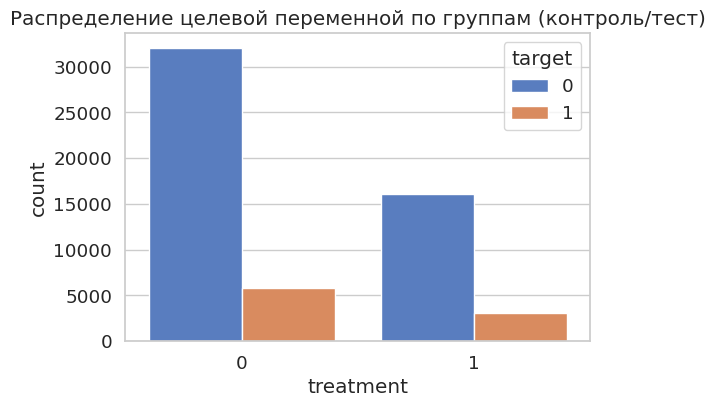

target,0,1
treatment,,
0,0.847327,0.152673
1,0.839814,0.160186


In [12]:
# целевая переменная и группы
plt.figure(figsize=(6,4))
sns.countplot(x="treatment", hue="target", data=data)
plt.title("Распределение целевой переменной по группам (контроль/тест)")
plt.show()

data.groupby("treatment")["target"].value_counts(normalize=True).unstack()

Распределение целевой переменной (target) внутри контрольной (treatment=0) и тестовой (treatment=1) групп:

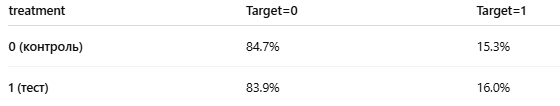

**Выводы:**
- Доли классов target=1 (положительный отклик) и target=0 (нет отклика) в контрольной и тестовой группах очень близки друг к другу.
- В контрольной группе 15.3% положительных исходов, в тестовой — 16.0%.
- Разница между группами составляет всего ~0.7 процентных пункта → баланс между группами сохранён.
- Это означает, что эксперимент был проведён корректно и случайное распределение сработало (группы сопоставимы по целевой переменной).

# Этап 2

### Проверка на статистическую значимость

In [13]:
from scipy import stats

In [14]:
# Статистические тесты
control = data[data["treatment"]==0]["target"]
treatment = data[data["treatment"]==1]["target"]

- Нулевая гипотеза (H0) Shapiro–Wilk теста: данные имеют нормальное распределение.
- Альтернативная гипотеза (H1): распределение отличается от нормального.

In [16]:
# Проверка нормальности
print("Shapiro-Wilk контроль:", stats.shapiro(control))
print("Shapiro-Wilk тест:", stats.shapiro(treatment))

Shapiro-Wilk контроль: ShapiroResult(statistic=np.float64(0.43021954334089574), pvalue=np.float64(6.796853500813074e-138))
Shapiro-Wilk тест: ShapiroResult(statistic=np.float64(0.44072918688447227), pvalue=np.float64(3.9137563930036182e-118))


Критерий: если p-value < 0.05, отвергаем H0.

В моем случае p-value ≪ 0.05 (практически 0), значит я с очень высокой уверенностью отвергаем гипотезу о нормальности.

Проверяю гипотезу:  
- H0: Конверсия (доля `target=1`) в контрольной и тестовой группе одинакова.  
- H1: Конверсия различается. 

In [17]:
# Так как бинарные значения -> применим тест хи-квадрат
contingency = pd.crosstab(data["treatment"], data["target"])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"\nChi2 test: chi2={chi2:.3f}, p-value={p:.3f}")


Chi2 test: chi2=5.418, p-value=0.020


`p-value < 0.05`, я отвергаю H0 и делаю вывод, что различия между группами статистически значимы.

In [21]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

In [22]:
# Z-тест для пропорций
successes = np.array([contingency.loc[0,1], contingency.loc[1,1]])  # количество успехов (target=1)
nobs = np.array([contingency.loc[0].sum(), contingency.loc[1].sum()])  # количество наблюдений в каждой группе

z_stat, p_ztest = proportions_ztest(successes, nobs)
print(f"\nZ-test for proportions:")
print(f"z-stat = {z_stat:.4f}, p-value = {p_ztest:.4f}")


Z-test for proportions:
z-stat = -2.3399, p-value = 0.0193


In [23]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

# количество успехов (target=1) в группах
success = data.groupby('treatment')['target'].sum().values
# количество наблюдений в группах
nobs = data.groupby('treatment')['target'].count().values

z_stat, pval = proportions_ztest(success, nobs)
print(f"Z-статистика = {z_stat:.4f}, p-value = {pval:.4f}")

Z-статистика = -2.3399, p-value = 0.0193


`p-value < 0.05`, я отвергаю H0 и делаю вывод, что различия между группами статистически значимы.

**Обоснование выбора статистического теста:**

Мы проверяем гипотезу:  
- H0: Конверсия (доля `target=1`) в контрольной и тестовой группе одинакова.  
- H1: Конверсия различается.  

Возможные тесты
1. t-тест (сравнение средних)
- Применим только если данные распределены нормально.
- В случае бинарной переменной распределение не нормальное, а биномиальное.
- Поэтому t-тест здесь не лучший выбор.
2. Тест Манна-Уитни (U-test)
- Непараметрический тест, сравнивает распределения между двумя независимыми группами.
- Можно использовать, если не выполняются предпосылки t-теста.
- Но он не идеально подходит для долей, больше для непрерывных величин.
3. χ²-тест независимости (Chi-square test)
- Сравнивает частоты (количество 0 и 1) в категориальных группах.
- Оптимален для бинарных переменных, особенно при больших выборках.
- В нашем случае (64 000 клиентов) — подходит отлично.
4. Z-тест для пропорций
- То же самое, что χ²-тест, но формулирован как сравнение долей (например, 40% против 42%).
- Для A/B-тестов это даже более привычный подход.

Вывод:

Для моей задачи лучший выбор — χ²-тест или Z-тест для пропорций, потому что:
- переменные категориальные (0/1);
- группы независимые;
- выборка большая, биномиальное распределение хорошо аппроксимируется нормальным.

1. **χ²-тест независимости** проверяет, есть ли связь между `treatment` и `target`.  
2. **Z-тест для пропорций** напрямую сравнивает доли успехов в двух независимых выборках.  

Если `p-value < 0.05`, мы отвергаем H0 и делаем вывод, что различия между группами статистически значимы.

Так как мы сравниваем две независимые выборки по бинарному признаку (`target` = 0/1), проверка нормальности распределения здесь не имеет смысла, поскольку данные дискретные.  
Для оценки различий в конверсии между контрольной (`treatment=0`) и тестовой (`treatment=1`) группами корректнее использовать **χ²-тест независимости** либо **Z-тест для пропорций**.  
Эти методы позволяют проверить гипотезу о равенстве долей успехов в двух группах.  

## Построение корреляций

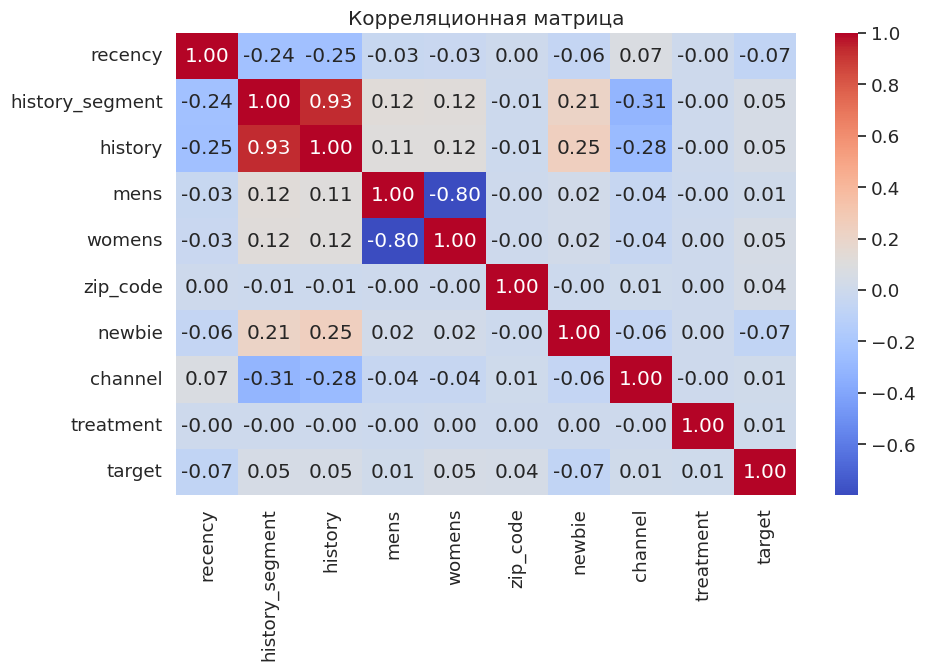

In [24]:
# Корреляционный анализ
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

### **Выводы** о корреляциях признаков друг с другом и таргетом:
*Корреляции:*
1. womens ↔ mens = -0.8 -> 
- Очень сильная отрицательная корреляция.
- Это значит, что пользователи, которые покупали товары для женщин, реже покупают товары для мужчин, и наоборот.
- В модели такие признаки могут нести схожую информацию (мультиколлинеарность). Возможно, стоит объединить их в один признак («тип покупок» или «основное направление интересов»).
2. history ↔ history_segment = 0.93  -> 
- Почти полная линейная зависимость.
- history_segment фактически является категоризацией history, поэтому держать оба признака в модели не имеет смысла — достаточно одного.
- Для моделей типа логистической регрессии лучше использовать history_segment (категориальная интерпретация), а для деревьев можно оставить history.
3. history ↔ newbie = 0.25
- Умеренная положительная корреляция.
- Новые пользователи (newbie=1) тратят в среднем меньше (корреляция положительная, но не сильная, так что связь есть, но она не строгая).-
- Это подтверждает гипотезу: новички ещё не "раскачались" и тратят меньше.
4. history ↔ channel = -0.28
- Умеренная отрицательная корреляция.
- Канал взаимодействия пользователя может быть связан с его расходами: например, те, кто активнее использует мобильный канал, могут тратить меньше, а мультиканальные клиенты — больше.
- Это полезно для сегментации: можно добавить фичи вида "средний чек по каналу".

**Выводы для модели:**
- Избыточные признаки: history и history_segment — стоит оставить один.
- Сильная коллинеарность: mens и womens → можно объединить или использовать как категорию «тип клиента».
- Полезные инсайты:
- - Новички (newbie) тратят меньше.
- - Канал влияет на расходы (отрицательная корреляция).

**Дополнительные связи:**
1. recency ↔ history_segment = -0.25
2. recency ↔ history = -0.25
- Отрицательная корреляция (хоть и умеренная).
- Интерпретация: чем дольше клиент не совершал покупок (большая recency), тем меньше у него сумма прошлых покупок (history) и ниже его сегмент.
- Логично: “спящие” клиенты — это обычно клиенты с низкой историей покупок.
3. mens ↔ history = 0.11
4. womens ↔ history = 0.11
5. mens ↔ history_segment = 0.12
6. womens ↔ history_segment = 0.12
- Очень слабая положительная корреляция.
- То есть покупки мужских/женских товаров немного связаны с суммой прошлых покупок.
- Это значит, что “большие тратящие” клиенты покупают и там, и там чуть больше, но сила связи маленькая, поэтому полагаться на это как на ключевой фактор не стоит.
- Для модели такие признаки полезны, но скорее как дополнительные.

**Выводы:**
- recency и history/history_segment дают важную обратную связь: давние клиенты тратят меньше.
- mens и womens почти не завязаны на историю покупок, но дают направление интересов клиента.
- Сильной зависимости нет → это скорее разные измерения поведения клиента:
- - history / history_segment → общий "уровень траты",
- - recency → давность активности,
- - mens / womens → предпочтения по товару

- изучим взаимодействие признаков

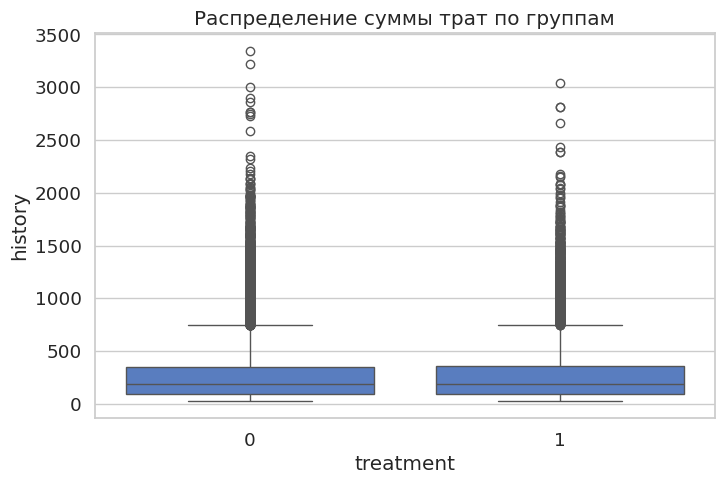

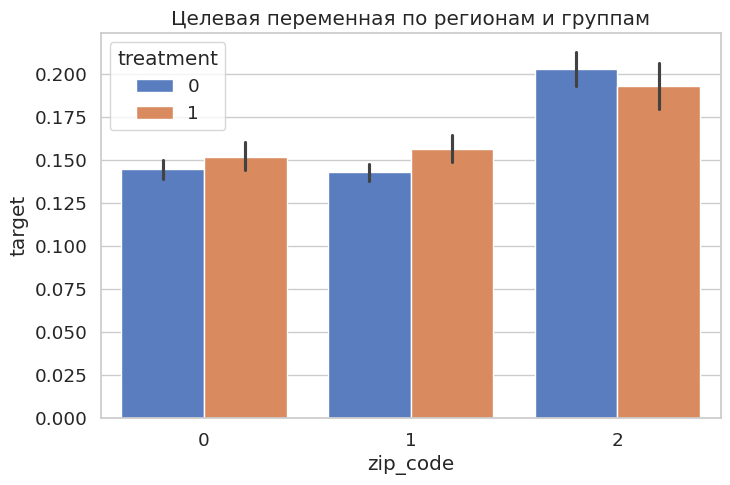

In [38]:
# Взаимодействие признаков
plt.figure(figsize=(8,5))
sns.boxplot(x="treatment", y="history", data=data)
plt.title("Распределение суммы трат по группам")
plt.savefig("./EDA/amounts_by_groups.png")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="zip_code", y="target", hue="treatment", data=data)
plt.title("Целевая переменная по регионам и группам")
plt.savefig("./EDA/target_by_region_and_group.png")
plt.show()

### Что видно на графике "распределение суммы трат":
1. **Медиана** (середина ящика)
- *Для обеих групп медианы находятся примерно на одном уровне (около 150–200).*
- *Это значит, что "типичный" уровень трат в обеих группах одинаковый.*
2. **Интерквартильный размах** (ширина ящика)
- *Ящики (25-й и 75-й перцентиль) также практически совпадают → распределение в среднем схожее по форме.*
3. **Усы**
- *Верхние "усы" уходят примерно до 700–800. Это значит, что большинство пользователей тратят в пределах этих значений.*
4. **Выбросы** (кружки выше усов)
- *В обеих группах есть много пользователей с аномально высокими тратами (2000–3000+).*
- *Наличие таких выбросов типично для данных о тратах (несколько "VIP" клиентов сильно влияют на распределение).*

### **Выводы:**
- Контроль и тест сопоставимы по распределению исторических трат.
- Нет заметного сдвига: группы выглядят сбалансированными.
- Основное отличие — это наличие редких "сверхтратящих" клиентов, но они встречаются в обеих группах.

### Что видно на графике "Целевая переменная по регионам и группам":
- X → zip_code (регионы / сегменты клиентов),
- Y → среднее значение target (например, конверсия, отклик, факт покупки),
- Цвет = контроль (0, синий) и тест (1, оранжевый).
Вертикальные линии = доверительные интервалы.

### Что видно:
1. Регион 0 (zip_code=0):
- Контроль ≈ 0.145, тест ≈ 0.152.
- Тест немного выше, но разница небольшая.
2. Регион 1 (zip_code=1):
- Контроль ≈ 0.142, тест ≈ 0.156.
- Разница чуть больше, тест снова выше.
3. Регион 2 (zip_code=2):
- Контроль ≈ 0.202, тест ≈ 0.192.
- Здесь наоборот: тест показывает результат хуже, чем контроль.

### **Выводы:**
- В регионах 0 и 1 тест показывает рост целевой метрики (эффект положительный).
- В регионе 2 — наоборот, эффект отрицательный, тест уступает контролю.
- Это значит, что влияние кампании/обработки разнится по сегментам (zip_code).
- Возможно стоит учитывать гетерогенность эффекта: в одних сегментах акция работает лучше, в других — хуже.

### Проверяем, зависят ли распределения target от сочетания treatment и zip_code.
Если p-value маленькое → значит, что эффект действительно разный по регионам.

In [25]:
import pandas as pd
from scipy.stats import chi2_contingency

# предполагаем, что у тебя DataFrame называется df
# где есть столбцы: zip_code, treatment, target

# строим кросс-таблицу
ct = pd.crosstab([data['zip_code'], data['treatment']], data['target'])
print(ct)

# χ²-тест
chi2, p, dof, ex = chi2_contingency(ct)
print(f"χ² = {chi2:.4f}, p-value = {p:.4f}")

target                  0     1
zip_code treatment             
0        0          12995  2195
         1           6480  1161
1        0          14466  2412
         1           7254  1344
2        0           4590  1168
         1           2356   564
χ² = 165.1891, p-value = 0.0000


Получили частоты target=0/1 по регионам (zip_code) и группам (treatment):
- zip_code=0: конверсия выше в группе с промо (1161 / (6480+1161) ≈ 15.2% против 2195 / (12995+2195) ≈ 14.5%).
- zip_code=1: аналогично, в промо группе конверсия выше (1344 / (7254+1344) ≈ 15.6% против 2412 / (14466+2412) ≈ 14.3%).
- zip_code=2: здесь обратная ситуация — контрольная группа показывает лучшую конверсию (1168 / (4590+1168) ≈ 20.3% против 564 / (2356+564) ≈ 19.3%).

То есть, эффект промокода зависит от региона: где-то он помогает, а где-то даже снижает результат.

χ² = 165.19
p-value < 0.0001

Это значит, что распределение target действительно статистически значимо зависит от комбинации (zip_code, treatment).
Просто случайными флуктуациями такие различия объяснить нельзя.

Вывод
- В регионах 0 и 1 промо работает и повышает конверсию.
- В регионе 2 промо неэффективно (даже слегка ухудшает результат).
- Для стратегии — промокод стоит таргетировать на регионы 0 и 1, а регион 2 лучше исключить или предложить другой оффер.

### Логистическая регрессия с взаимодействием

Идея: строим модель, где target объясняется treatment, zip_code и их взаимодействием.
Если взаимодействие значимо → значит, эффект отличается по регионам.

In [26]:
import statsmodels.formula.api as smf

# регрессия: target ~ treatment + zip_code + treatment*zip_code
model = smf.logit("target ~ C(treatment) * C(zip_code)", data=data).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.430246
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                56985
Model:                          Logit   Df Residuals:                    56979
Method:                           MLE   Df Model:                            5
Date:                Fri, 03 Oct 2025   Pseudo R-squ.:                0.003187
Time:                        06:09:43   Log-Likelihood:                -24518.
converged:                       True   LL-Null:                       -24596.
Covariance Type:            nonrobust   LLR p-value:                 4.782e-32
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -1.7784      0.023    

**C(treatment)[T.1]:C(zip_code)[T.1]** — это коэффициент для взаимодействия получил промо (treatment=1) × регион=1.
То есть, насколько эффект промокода отличается в регионе 1 по сравнению с базовой категорией региона (обычно zip_code=0).

- 0.0465 — оценка коэффициента (β).
В терминах линейной/логистической модели: это изменение отклика (или log-odds, если логистическая регрессия) относительно базовой линии.
- 0.054 — стандартная ошибка.
- 0.861 — t-статистика (β / SE).
- 0.389 — p-value.
Значит, эффект взаимодействия treatment × zip_code=1 статистически незначим (p > 0.05).
- [-0.059; 0.152] — 95% доверительный интервал. Так как он включает 0, статистически значимого эффекта нет.

**C(treatment)[T.1]:C(zip_code)[T.2]** - Здесь мы смотрим на взаимодействие treatment=1 × zip_code=2
- 0.1200 — коэффициент отрицательный → промо в регионе 2 работает хуже, чем в базовом регионе 0.
- p-value = 0.084 → на уровне значимости 0.05 результат не значим, но близок к порогу (маргинально значимый).
На уровне 0.1 можно было бы интерпретировать как слабый сигнал, что в регионе 2 промо действительно снижает эффект.
- ДИ = [-0.256; 0.016] → включает 0, поэтому формально значимости нет.

**Итог**
- Для региона 1 → эффект промо примерно такой же, как в базовом регионе (нет значимых различий).
- Для региона 2 → есть слабый сигнал, что промо хуже работает, чем в регионе 0 (но результат на грани значимости).

## Этап 3

Обоснуйте выбор конкретной uplift модели в данной ячейке

### Советы по обучению и инференсу моделей
1. Некоторые uplift модели из библиотеки `causalml` будут требовать категориальные значения воздействия. Для этого используйте маппинг
#### Пример использования маппинга
```python
treatment_mapping = {
    0: 'control',
    1: 'treatment'
}
treatment_train_mapped = treatment_train.map(treatment_mapping)
treatment_test_mapped = treatment_test.map(treatment_mapping)
```

2. При вызове метода `.predict` и получения метрик для тестовой выборки не забывайте применять к прогнозам метод `squeeze()`, чтобы преобразовать многомерный массив в одномерный, что поможет получить адекватные метрики.

3. Для воспроизводимости результатов и объективной оценки не забывайте применять `random_state=42` для моделей, а также при разделении выборки

### Разбиение выборки на тренировочную и тестовую

### Обучение выбранного бейзлайна

### Расчет метрик для выбранного бейзлайна на тестовой выборке

# Обучение 2 моделей 

### Обучение модели 1

### Получение метрик по модели 1

### Обучение модели 2

### Получение метрик по модели 2

Проинтерпретируйте полученные результаты и обоснуйте выбор 1 модели в этой ячейке

# Часть 2

## Этап 1
Улучшите бейзлайн выбранной модели

#### Генерация признаков (опционально)

### Подбор гиперпараметров

In [ ]:
from optuna import create_study
from sklift.metrics import uplift_at_k

def objective(trial):
    # Дополните код для подбора гиперпараметров

    uplift_at_30 = uplift_at_k(y_test, uplift_pred, treatment_test, k=0.3, strategy='overall')
    return uplift_at_30

# Создаем и запускаем исследование
study = create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Выводим лучшие гиперпараметры
print("Best hyperparameters: ", study.best_params)
print("Best score: ", study.best_value)


## Этап 2

### Визуализация результатов

In [ ]:
from utils import custom_uplift_by_percentile

В данной ячейке сделайте вывод о качестве работы модели и проинтерпретируйте график `uplift by percentile` 

# Этап 3

In [138]:
# Класс для инференса модели
class UpliftModelInference:
    """
    Класс для инференса uplift модели.
    """
    
    def __init__(self, model, feature_names, logger=None):
        """
        Инициализация класса.
        
        Аргументы:
            model: Обученная модель uplift
            feature_names: Список признаков для предсказания 
            logger: Объект для логирования (по умолчанию None)
        """
        self.model = model
        self.feature_names = ['recency', 'history_segment', 'history', 'mens', 'womens', 'zip_code', 'newbie', 'channel']
        self.logger = logger
        
        if self.logger:
            self.logger.info("Модель UpliftModel инициализирована с признаками: %s", feature_names)

    def _transform_data(self, X):
        """
        Преобразование данных для модели.
        
        Аргументы:
            X: pandas.DataFrame с признаками
        """
        if self.logger:
            self.logger.debug("Преобразование входных данных размерности %s", X.shape)

        # реализуйте преобразование данных для модели,
        # если в финальной модели используются новые признаки
       

        return X
    
    def predict(self, X):
        """
        Получение предсказаний uplift.
        
        Аргументы:
            X: pandas.DataFrame с признаками
            
        Возвращает:
            numpy.array с предсказанными значениями uplift
        """
        # Проверяем, что датафрейм не пустой
        if X.empty:
            if self.logger:
                self.logger.error("Предоставлен пустой датафрейм")
            return None
            
        # Проверяем наличие пропущенных значений
        if X.isnull().any().any():
            if self.logger:
                self.logger.error("Входные данные содержат пропущенные значения")
            return [None]*len(X)
        
        if self.logger:
            self.logger.info("Выполняем предсказания для данных размерности %s", X.shape)

        # Проверяем наличие всех необходимых признаков
        missing_features = set(self.feature_names) - set(X.columns)
        if missing_features:
            error_msg = f"Отсутствуют признаки: {missing_features}"
            if self.logger:
                self.logger.error(error_msg)

            return [None]*len(X)
        
        # Преобразуем данные для модели
        if self.logger:
            self.logger.debug("Начинаем преобразование данных")
        X = self._transform_data(X)
        
        # Вычисляем uplift
        if self.logger:
            self.logger.debug("Выполняем предсказания модели")
        

        # Дополните код для получения предсказаний аплифта

        
        if self.logger:
            self.logger.info("Предсказания успешно завершены")
            
        return uplift


In [126]:
model = UpliftModelInference(model= # ваш код,
                             feature_names= # ваш код)

In [ ]:
test_data = pd.DataFrame({
            'recency': [1, 2, 3],
            'history_segment': [1, 2, 3], 
            'history': [100, 200, 300],
            'mens': [1, 0, 1],
            'womens': [0, 1, 0],
            'zip_code': [1, 0, 1],
            'newbie': [0, 1, 0],
            'channel': [1, 2, 0]
        })

In [ ]:
# проверка работы класса
model.predict(test_data)